# Goal of the project : Applying the machine learning algorithms on the dataset

In [ ]:

import pandas as pd
import os 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
os.chdir("D:\\python\\__pycache__\\data_sets")#changing dir
import seaborn as sns


In [2]:
header=['flengt','fwidth','fsize','fconc','fconc1','fASYM','fm3long','fm3trans','falpha','fdist','class']
df=pd.read_csv('magic.csv',names=header)

In [3]:
# converting the class in the '0'and '1 which are having g in the calss
df['class']=(df['class']=='g').astype(int)
df

,flengt,fwidth,fsize,fconc,fconc1,fASYM,fm3long,fm3trans,falpha,fdist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
flengt      19020 non-null float64
fwidth      19020 non-null float64
fsize       19020 non-null float64
fconc       19020 non-null float64
fconc1      19020 non-null float64
fASYM       19020 non-null float64
fm3long     19020 non-null float64
fm3trans    19020 non-null float64
falpha      19020 non-null float64
fdist       19020 non-null float64
class       19020 non-null int32
dtypes: float64(10), int32(1)
memory usage: 1.5 MB


In [5]:
x=df.drop('class',axis=1)         #splitting data in the x and y
y=df['class']

# Vizulation the data via box plot


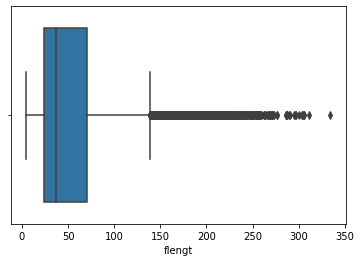

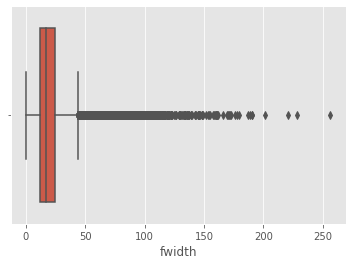

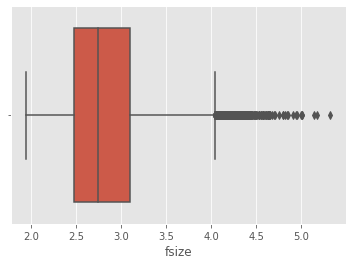

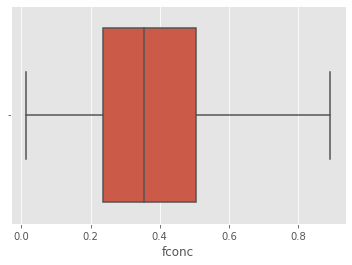

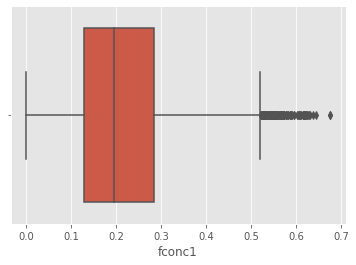

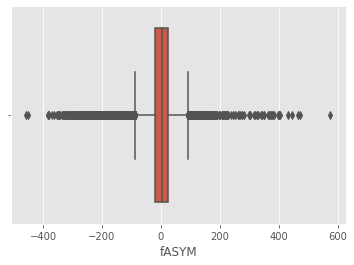

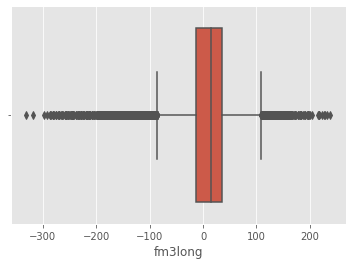

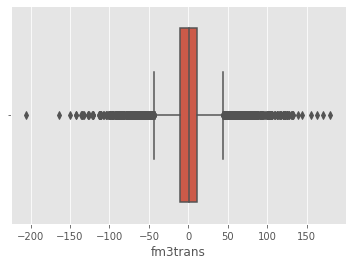

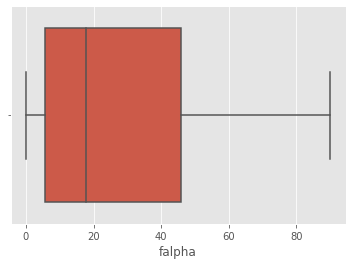

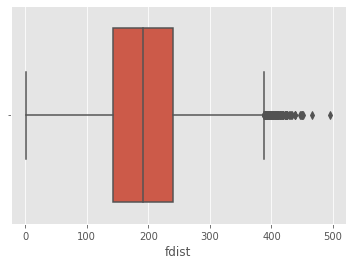

In [6]:
for i in x.columns  :
     plt.subplot(1,2,1)
     plt.figure()
     sns.boxplot(x[i])
     plt.style.use('ggplot')
     plt.subplot(1,2,2)
        plt.figure()
     sns.boxplot(xy[i])
     plt.style.use('ggplot')
     plt.show()
    

In [ ]:
# splitting the data in to the training and testing

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [8]:
#feature scaling the data_set
from sklearn.preprocessing import StandardScaler
scale=StandardScaler().fit(x_train)
x_train=scale.transform(x_train)
x_test=scale.transform(x_test)

# Model-1
# kNeighbour_classifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier                               #importing ml model
model=KNeighborsClassifier().fit(x_train,y_train)
y_pred=model.predict(x_test)

In [10]:
from sklearn.metrics import classification_report                               #model_metrics

In [11]:
print(classification_report(y_test,y_pred))
m1=classification_report(y_pred,y_test)

              precision    recall  f1-score   support

           0       0.84      0.65      0.74      1344
           1       0.83      0.93      0.88      2460

    accuracy                           0.83      3804
   macro avg       0.84      0.79      0.81      3804
weighted avg       0.84      0.83      0.83      3804



# Model-2
# LogisticRegression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model2=LogisticRegression(solver='liblinear').fit(x_train,y_train)
y_pred=model2.predict(x_test)

In [15]:
print(classification_report(y_pred,y_test))
m2=classification_report(y_pred,y_test)

              precision    recall  f1-score   support

           0       0.60      0.76      0.67      1067
           1       0.90      0.81      0.85      2737

    accuracy                           0.79      3804
   macro avg       0.75      0.78      0.76      3804
weighted avg       0.81      0.79      0.80      3804



# Model-3
# Naivebayes

In [16]:
# importing the model
from sklearn.naive_bayes import GaussianNB

In [17]:
model3=GaussianNB().fit(x_train,y_train)
y_pred=model3.predict(x_test)

In [18]:
print(classification_report(y_pred,y_test))
m3=classification_report(y_pred,y_test)

              precision    recall  f1-score   support

           0       0.38      0.71      0.49       711
           1       0.92      0.73      0.81      3093

    accuracy                           0.73      3804
   macro avg       0.65      0.72      0.65      3804
weighted avg       0.82      0.73      0.75      3804



In [19]:
xy=pd.DataFrame(x_train)   #all the columns are converted in range b/w 0-1 using feature scaling
xy.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.542942,-0.627389,-0.645901,0.260520,0.523117,0.064575,-0.460143,-0.216104,1.476652,-0.843781
1,-0.665733,-0.509193,-0.801014,0.494667,0.396203,0.435778,-0.037637,-0.365439,-0.041325,-0.515865
2,-0.691435,-0.347563,-0.531418,0.189731,0.282790,0.407805,-0.363102,0.209368,0.122819,-0.826944
3,-0.158598,0.358810,1.209101,-1.057236,-1.037664,0.370249,0.694068,0.486575,-0.567569,-1.156773
4,-0.901246,-0.401550,-1.257675,2.068350,1.499731,0.431572,-0.270386,-0.402654,1.353088,0.800225
